![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [ ]:
# Ignorar alertas
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout

In [4]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


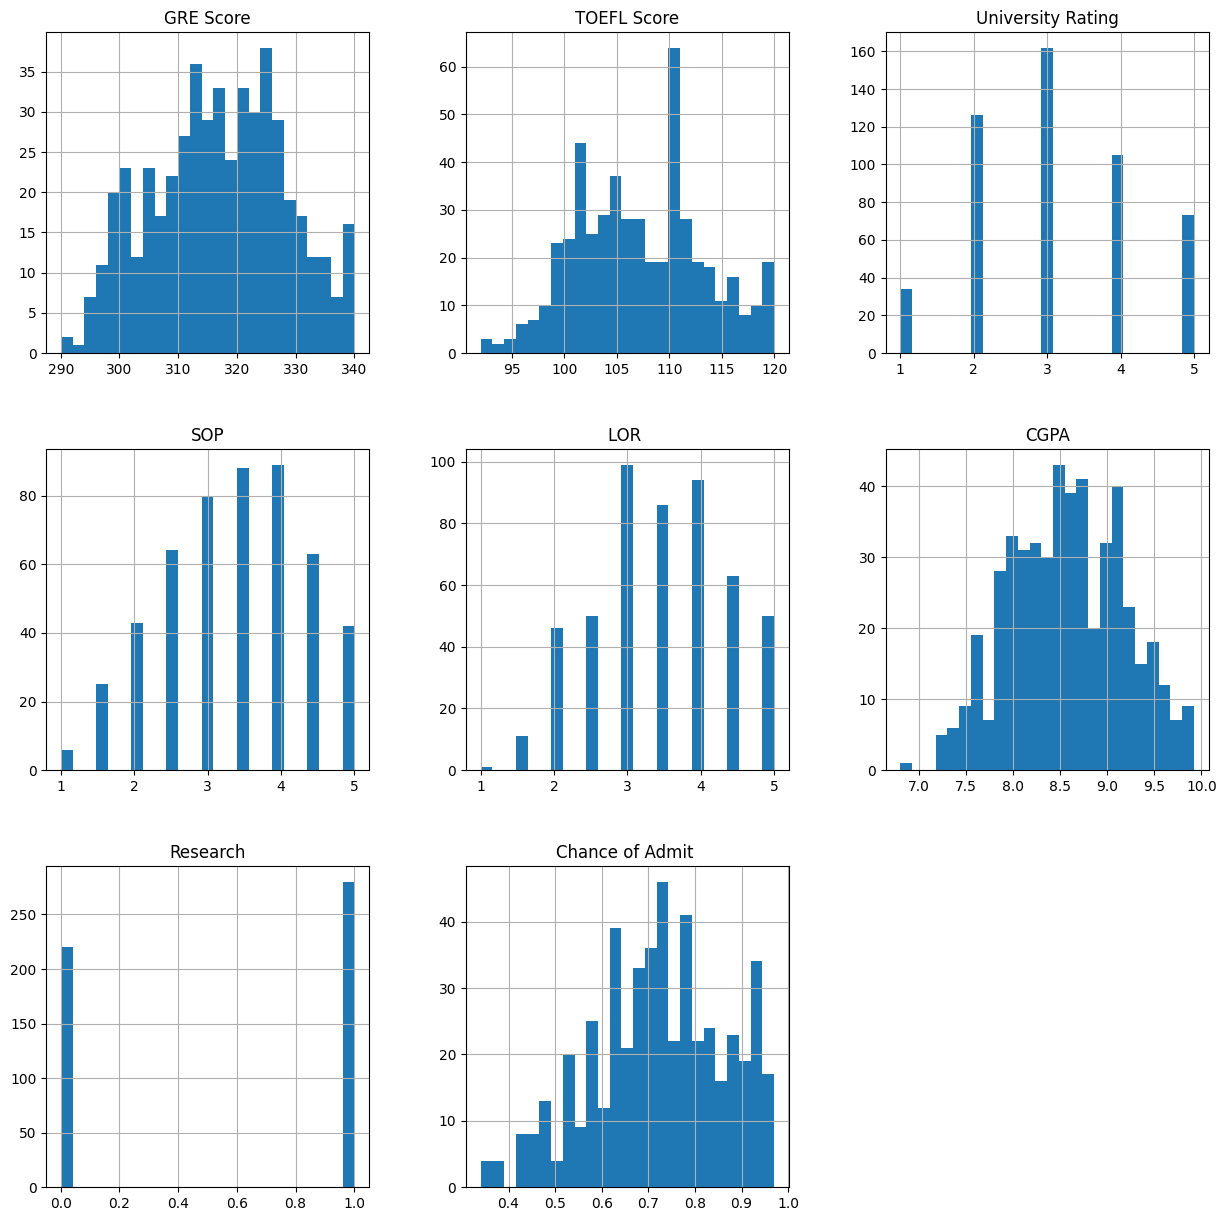

In [5]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [6]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [7]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [15]:
# Celda 1


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [16]:
# Celda 2


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [19]:
# Celda 3
# 1. Cargar y preparar datos

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xTrain)
X_test_scaled = scaler.transform(xTest)



In [20]:
# 2. Construcción del modelo multicapa
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(1)  # salida
])

# 3. Compilación
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [21]:

# 4. Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# 5. Entrenamiento
history = model.fit(
    X_train_scaled, yTrain,
    validation_data=(X_test_scaled, yTest),
    epochs=100,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 1.3820 - mae: 1.1635

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.5880 - mae: 0.6509 - val_loss: 0.1559 - val_mae: 0.2923
Epoch 2/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1302 - mae: 0.2800

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0761 - mae: 0.2135 - val_loss: 0.0611 - val_mae: 0.2185
Epoch 3/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0544 - mae: 0.2088

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0447 - mae: 0.1831 - val_loss: 0.0272 - val_mae: 0.1327
Epoch 4/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0185 - mae: 0.1184

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0222 - mae: 0.1207 - val_loss: 0.0181 - val_mae: 0.1113
Epoch 5/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0199 - mae: 0.0998

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0164 - mae: 0.1014 - val_loss: 0.0146 - val_mae: 0.1006
Epoch 6/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0077 - mae: 0.0744

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0109 - mae: 0.0849 - val_loss: 0.0120 - val_mae: 0.0890
Epoch 7/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0068 - mae: 0.0713

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0085 - mae: 0.0756 - val_loss: 0.0103 - val_mae: 0.0833
Epoch 8/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0079 - mae: 0.0744

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0075 - mae: 0.0699 - val_loss: 0.0090 - val_mae: 0.0746
Epoch 9/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0125 - mae: 0.0864

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074 - mae: 0.0664 - val_loss: 0.0074 - val_mae: 0.0678
Epoch 10/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0042 - mae: 0.0509

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0051 - mae: 0.0558 - val_loss: 0.0064 - val_mae: 0.0630
Epoch 11/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0049 - mae: 0.0522

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0046 - mae: 0.0537 - val_loss: 0.0059 - val_mae: 0.0588
Epoch 12/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0041 - mae: 0.0496

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041 - mae: 0.0504 - val_loss: 0.0057 - val_mae: 0.0563
Epoch 13/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0032 - mae: 0.0482

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0035 - mae: 0.0470 - val_loss: 0.0050 - val_mae: 0.0539
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035 - mae: 0.0449 - val_loss: 0.0050 - val_mae: 0.0531
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mae: 0.0426 - val_loss: 0.0051 - val_mae: 0.0522
Epoch 16/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0017 - mae: 0.0359

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0027 - mae: 0.0406 - val_loss: 0.0045 - val_mae: 0.0504
Epoch 17/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 - mae: 0.0383 - val_loss: 0.0047 - val_mae: 0.0513
Epoch 18/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 - mae: 0.0383 - val_loss: 0.0046 - val_mae: 0.0505
Epoch 19/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - mae: 0.0355 - val_loss: 0.0046 - val_mae: 0.0516
Epoch 20/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023 - mae: 0.0354 - val_loss: 0.0047 - val_mae: 0.0508
Epoch 21/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023 - mae: 0.0360 - val_loss: 0.0052 - val_mae: 0.0523


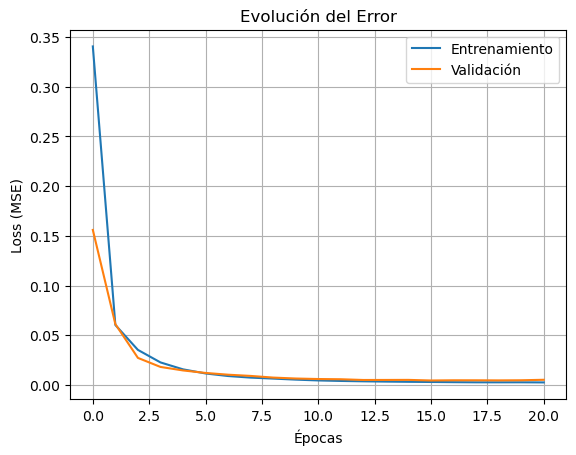

In [22]:
# 6. Graficar pérdidas
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.title('Evolución del Error')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 7. Evaluar el modelo final en el conjunto de prueba

# Predecir en los datos de prueba
y_pred = model.predict(X_test_scaled)

# Calcular y mostrar métricas
mae = mean_absolute_error(yTest, y_pred)
mse = mean_squared_error(yTest, y_pred)

print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Error Absoluto Medio (MAE): 0.0523
Error Cuadrático Medio (MSE): 0.0052


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [23]:
# Celda 4
